# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
# импорт необходимых библиотек
import pandas as pd   
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv') # чтение файла и сохранение  переменной

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

**1 столбец - видимо что то не так, выведу первые 5 строк файла, что бы увидеть в чем проблема.**

In [4]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


*Все данные "склеились", и видно, что информацию разделяет символ табулиции `\t`, перезапишу файл но уже с разделителем и проверю все заново.*

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Визуальный просмотр таблицы

Теперь мы видем, что у нас 20 столбцов и у каждого свой тип данных, выведем 5 строк таблицы для просмотра информации

In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Построение гистограмм

Можно сделать гистрограмму по всем столбцам

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

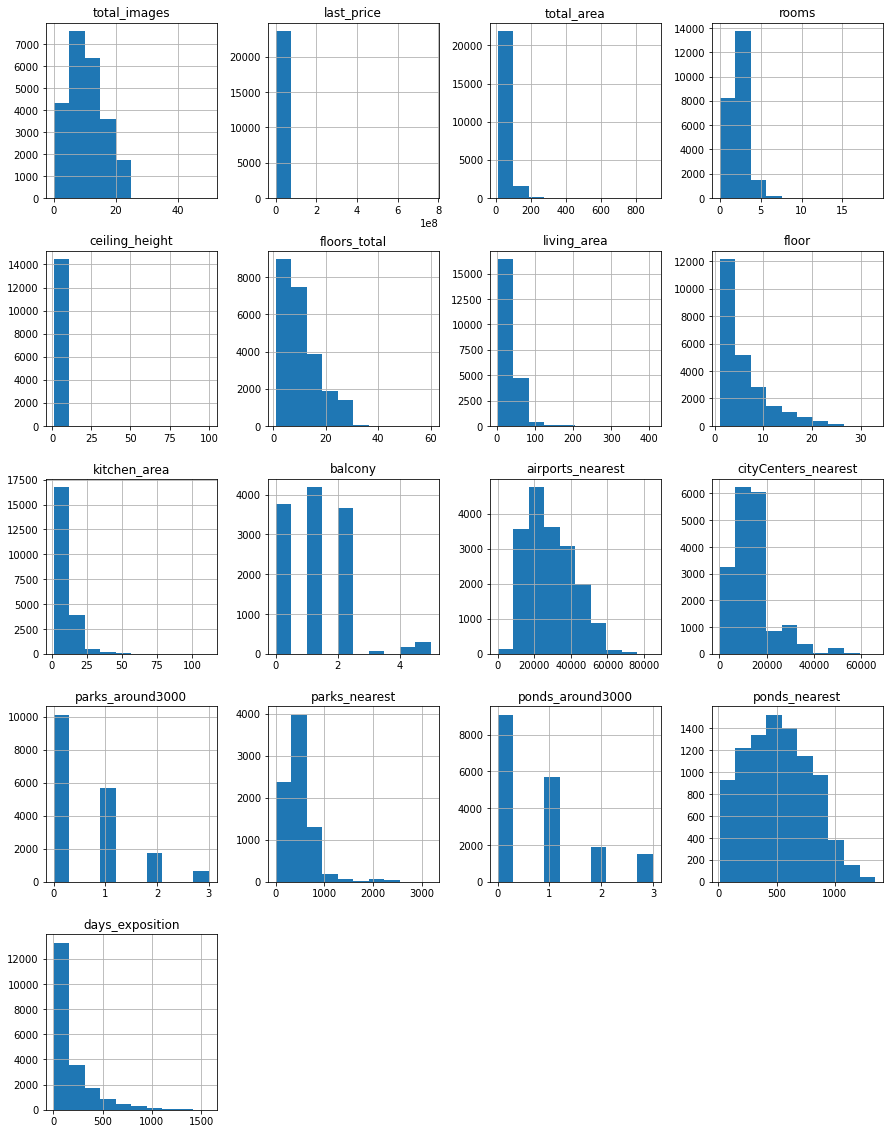

In [8]:
data.hist(figsize = (15,20))

## Предобработка данных

In [9]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}) 
#переименовал столбец, что бы все соответствовало "хорошему стилю"

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Проверим сколько пропуско в каждом столбце

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')
#количество пропусков в % от общего числа строк

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


У нас `23699` строк данных, из которых `49` строк с пропусками в графе `locality_name` и `86` строк с отсутствием этажности, на общую картину удаление такого количества данных не должно повлиять

In [13]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [14]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

In [15]:
data['floors_total'] = data['floors_total'].astype(int) # поменяю тип данных на целочисленный int

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Удаление пропусков и изменение типов данных

### Удаление пропусков в столбцах "колечесвто парков и озер"
**Tак как если они не указаны, лучше всего заменить на `0`**

In [17]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int) #сразу изменю тип данных на целочисленный

In [18]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)#сразу изменю тип данных на целочисленный

### Удаление пропусков в `balcony` и `is_apartment` 

**Заменим все пропуски на `0`, предположив что продаец просто не указал их отсутствие**

In [19]:
data['balcony'] = data['balcony'].fillna(0).astype(int)#сразу изменю тип данных на целочисленный

Далее займемся пропусками в обозначении апартаментов, так как этот столбец должен быть типа `bool`, отсутствие данных - предпологает, что продавец не знает относится ли его жилье к апартаментам( а если он этого не знает, значит врятли статус недвижимости у него с таким статусом).
<br>Заменим все пропуски на `False`

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Пропуски в площади кухни и жилой

Пропуски в столбцах `площадь кухни` и `жилая площадь`, заменю на средние показатели из всех обьявлений их отношения к общей площади

In [22]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].mean() / data['total_area'].mean())

In [23]:
data['living_area']=data['living_area'].fillna(data['living_area'].mean() / data['total_area'].mean())

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Пропуски в высоте потолков

**Теперь займемся последним столбцом с пропусками. Выведем уникальные значения столбца**

In [25]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Очень интересный вывод, получается в Санкт-Петербурге очень много планировок квартир, правда возможность существования квартир с потолками высотой 10 метров - еще верится, как люксовые двухэтажные квартиры.
<br> То вот потолки выше 10 метров уже смущают, так же как и квартиры с потолками до 2.5 метров, тоже кажутся какими-то  "детскими"

Можно предположить, что значения от 14 до 100 - указаны неверно, а просто забыли поставить точку в нужном месте(что-то вроде 20 - 2 метра, а 27.5 - 2.75 метров), для начала заменим диапозон этих данных

In [26]:
data.loc[~(data['ceiling_height'] <14) 
         & (data['ceiling_height'] <= 100), 'ceiling_height' ] = (
    data.loc[~(data['ceiling_height'] <20) 
             & (data['ceiling_height'] <= 100), 'ceiling_height' ].div(10)
)


**Заменим значения "квартир для лилипутов" (до 2.5 метров, 2,55 метра - это стандартная высота потолков в жилых помещениях (точнее, по современным правилам потолки не могут быть ниже 2,5 метра).), заменю их на медианным значением.**

In [27]:
data.loc[data['ceiling_height'] <=2.5, 'ceiling_height'] = data['ceiling_height'].median()

**Ну и сами пропуски в столбце заменю на медианные значения, что бы сильно не искозить данные**

In [28]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [29]:
data['ceiling_height']= round(data['ceiling_height'], 1) #округлим до 1 десятой   

In [30]:
data['ceiling_height'].sort_values().unique() #проверяю есть ли ещё какие уникальные значения

array([ 2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.2,  5.3,  5.5,  5.6,  5.8,  6. ,  8. ,
        8.3, 10. , 10.3])

In [31]:
data.isna().sum() # проверяю остались ли какие то пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Замена типов данных

In [32]:
data.info() #вывел таблицу инфо, что бы еще раз проверить типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Из всего списка осталось изменил типы данных нескольких столбцов:**
- `last_price` Так как окончательную цену удобнее видить в целом числе
- `first_day_exposition` - перевести в дату и время

In [33]:
data['last_price'] = data['last_price'].astype('int64')

**Последний столбец переводим в `дату и время`**

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [35]:
data.info() # проверяю тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Устранение дубликатов

**Теперь займемся устранением дубликатов**

In [36]:
data.duplicated().sum()

0

Явных дубликатов у нас нету, значит проверим неявные дубликаты в названии населенного пункта

In [37]:
data['locality_name'] = data['locality_name'].str.lower()# перевел все в нижний регистр, на всякий случай

In [38]:
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

**Переименую все садовые товарищества в `снт`, а поселки городского типа в `пгт`, так я уберу дубликаты, в которых в разном по разному писали эти словосочетания**

In [39]:
pgt = ['посёлок городского типа','поселок городского типа','городской посёлок', 
       'городской поселок','коттеджный поселок', 
       'поселок','посёлок']  #создал список уникальных выражений ПГТ

In [40]:
for row in pgt:
    data['locality_name'] = [index.replace(row, "пгт", 1) for index in data['locality_name']]
#переписал строчки в которых встречаются эти значения

In [41]:
snt = ['садоводческое некоммерческое товарищество', 'садовое товарищество'] #создал список уникальных выражений ПГТ

In [42]:
for row in snt:
    data['locality_name'] = [index.replace(row, "снт", 1) for index in data['locality_name']]
#переписал строчки в которых встречаются эти значения

In [43]:
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

## Посчитайте и добавьте в таблицу новые столбцы

In [44]:
data.head() #для удобства 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,11.000000,2,пгт шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,0.571174,9,False,...,0.175075,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


### Создание столбца с ценой квадратного метра

In [45]:
data['price_metr'] = data['last_price'] / data['total_area']

### Создание столбцов с днем недели где `0` - понедельник и тд, месяца и года

In [46]:
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [47]:
def name_days(row):
    try:
        if row == 0:
            return 'Понедельник'
        elif row == 1:
            return 'Вторник'
        elif row == 2:
            return 'Среда'
        elif row == 3:
            return 'Четверг'
        elif row == 4:
            return 'Пятница'
        elif row == 5:
            return 'Суббота'
        else:
            return 'Воскресенье'
    except:  
        return
    
#функция что бы вместо чисел подставлял названия дня недели

In [48]:
data['weekday_exposition'] = data['weekday_exposition'].apply(name_days)

In [49]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [50]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [51]:
data.head()#проверка своих действий

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,Четверг,3,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,Вторник,12,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,Четверг,8,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14,0.571174,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,Пятница,7,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,Вторник,6,2018


### Перевод в км растояние до центра

In [52]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [53]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest_km'], )

### Тип этажа `первый` или `последний`

In [54]:
def name_floor(down):
    try:
        if down['floor'] == 1:
            return 'Первый этаж'
        elif down['floor'] == down['floors_total']:
            return 'Последний этаж'
        else:
            return 'Другой этаж'
    except:  
        return
    
#функция которая сравнивает этажи

In [55]:
data['floor_name'] = data.apply(name_floor, axis=1)

In [56]:
data.head(5)# проверка последних добавлений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_name
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,482.0,2,755.0,NaN,120370.370370,Четверг,3,2019,16.0,Другой этаж
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,NaN,0,NaN,81.0,82920.792079,Вторник,12,2018,19.0,Первый этаж
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,90.0,2,574.0,558.0,92785.714286,Четверг,8,2015,14.0,Другой этаж
3,0,64900000,159.0,2015-07-24,3,2.6,14,0.571174,9,False,...,84.0,3,234.0,424.0,408176.100629,Пятница,7,2015,7.0,Другой этаж
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,112.0,1,48.0,121.0,100000.000000,Вторник,6,2018,8.0,Другой этаж


## Теперь проведём исследовательский анализ данных

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int64         
 1   last_price               23565 non-null  int64         
 2   total_area               23565 non-null  float64       
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int64         
 5   ceiling_height           23565 non-null  float64       
 6   floors_total             23565 non-null  int64         
 7   living_area              23565 non-null  float64       
 8   floor                    23565 non-null  int64         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             23565 n

### Анализ квадратных метров квартир

In [58]:
data['total_area'].describe()# для определения минимального и максимального значения

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

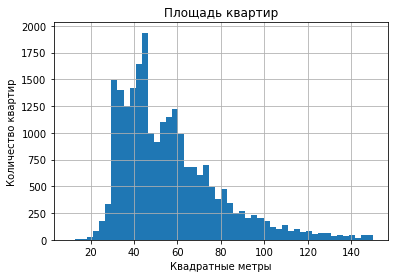

19431    900.0
12787    631.2
3103     631.0
15565    618.0
5330     590.0
4216     517.0
7977     507.0
14930    500.0
5863     500.0
12330    495.0
Name: total_area, dtype: float64

In [59]:
plt.hist(data['total_area'], bins=50, range=(10,150))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['total_area'].sort_values(ascending=False).head(10)

In [60]:
data['living_area'].describe()# для определения минимального и максимального значения

count    23565.000000
mean        31.773175
std         23.047978
min          0.571174
25%         17.800000
50%         29.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

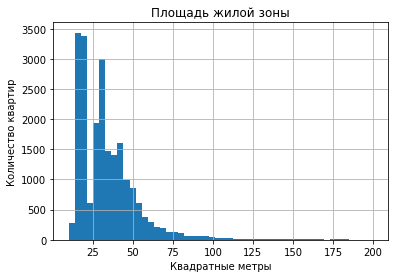

19431    409.7
5330     409.0
12330    347.5
4216     332.0
12787    322.3
657      312.5
7977     301.5
14009    300.0
20160    279.6
22368    274.0
Name: living_area, dtype: float64

In [61]:
plt.hist(data['living_area'], bins=50, range=(10,200))
plt.title('Площадь жилой зоны')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['living_area'].sort_values(ascending=False).head(10)

In [62]:
data['kitchen_area'].describe()# для определения минимального и максимального значения

count    23565.000000
mean         9.581681
std          6.383312
min          0.175075
25%          6.300000
50%          9.000000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

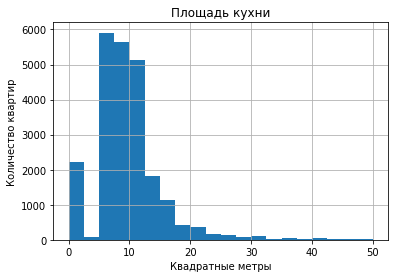

19431    112.0
20103    107.0
2480     100.7
5330     100.0
16150     93.2
16701     93.0
10807     87.2
489       77.0
4373      77.0
14559     75.0
Name: kitchen_area, dtype: float64

In [63]:
plt.hist(data['kitchen_area'], bins=20, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['kitchen_area'].sort_values(ascending=False).head(10)

**Вывод:**

- В продаже большой разброс квартир по площади, пик по графику в районе 40 кв.м - квартир с такой площадью продают больше всего.
- Максимальная площадь прожаваемой квартиры 900 кв.м
- Основная масса продаж это квартиры от 20 кв.м до 100 кв.м, далее идут единичные выбросы по площади продаваенмым квартирам
- На графике `жилоё площади` видно два пика в районе 20 и 30 кв.м, очевидно связанных с тем что больше всего продаж в 1 и 2х комнатных квартирах, с небольшой общей площадью
- Максимальная площадь кухни 112 кв.м, чаще всего встречаются кухни с площадью 8-11 кв.м, но есть небольшое количество квартир и с минимальным значением, видимо имеются в виду студии.

### Анализ цены продажи

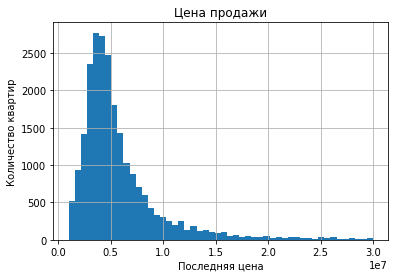

12897    763000000
19431    420000000
14621    401300000
1431     330000000
15565    300000000
22701    289238400
16372    245000000
13671    240000000
5863     230000000
8857     190870000
Name: last_price, dtype: int64

In [64]:
plt.hist(data['last_price'], bins=50, range=(1_000_000,30_000_000))
plt.title('Цена продажи')
plt.xlabel('Последняя цена')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['last_price'].sort_values(ascending=False).head(10)

**Вывод:**

- Максимальная цена продажи 763 млн
- чаще всего продают квартиры за 3-5 млн
- Основная масса продаж 2-7 млн

### Анализ кол-ва комнат и потолков

In [65]:
data['rooms'].describe()# для определения минимального и максимального значения

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

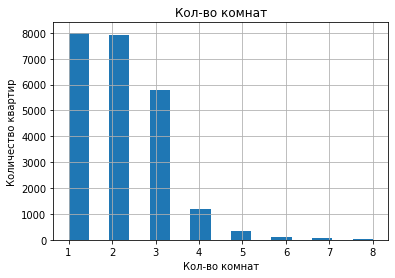

14414    19
18744    16
5330     15
20712    14
862      14
19431    12
645      11
9642     11
18787    10
18017    10
Name: rooms, dtype: int64

In [66]:
plt.hist(data['rooms'], bins= 15, range=(1,8))
plt.title('Кол-во комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['rooms'].sort_values(ascending=False).head(10)

In [67]:
data['ceiling_height'].describe()# для определения минимального и максимального значения

count    23565.000000
mean         2.697496
std          0.238372
min          2.500000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

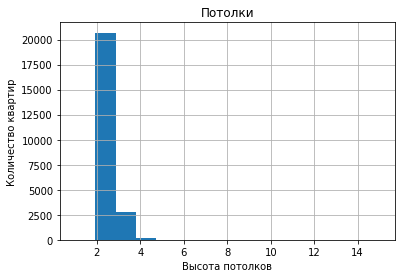

22184    10.3
22739    10.0
5833      8.3
15656     8.0
17345     8.0
3459      8.0
20151     6.0
21109     5.8
1383      5.6
7540      5.5
Name: ceiling_height, dtype: float64

In [68]:
plt.hist(data['ceiling_height'], bins=15, range=(1,15))
plt.title('Потолки')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['ceiling_height'].sort_values(ascending=False).head(10)

**Выводл:**

- Больше всего продаются 1-2 комнатные квартиры
- Квартиры в которых больше 6 комнат - "уникальные" продавались в единичных случаях
- Максимальное количество комнат в продажде - 19шт
- Потолки в основном в продаже стандартной высоты 2,5-3 метра
- Есть квартиры в продаже с потолками до 10 метров

### Анализ этажности квартир

In [69]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

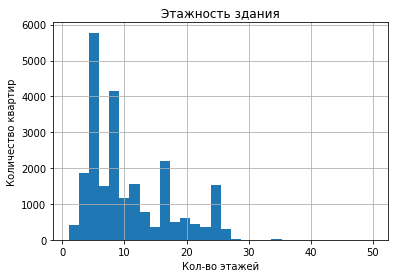

2245     60
16635    52
16837    37
5777     36
11017    36
395      36
13896    35
2953     35
9141     35
1911     35
Name: floors_total, dtype: int64

In [70]:
plt.hist(data['floors_total'], bins=30, range=(1,50))
plt.title('Этажность здания')
plt.xlabel('Кол-во этажей')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['floors_total'].sort_values(ascending=False).head(10)

In [71]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

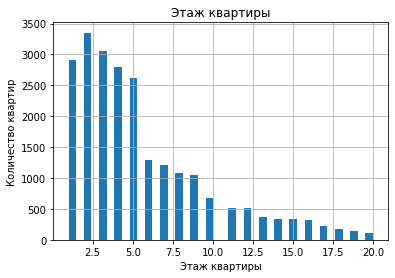

18116    33
11507    32
18526    31
1911     30
11017    29
395      28
12815    27
16549    27
23160    27
4073     27
Name: floor, dtype: int64

In [72]:
plt.hist(data['floor'], bins=40, range=(1,20))
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
data['floor'].sort_values(ascending=False).head(10)

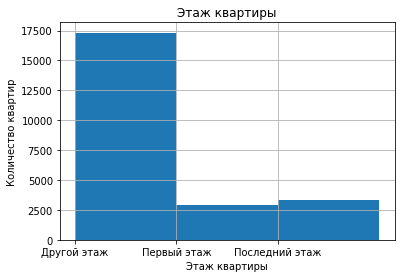

In [73]:
plt.hist(data['floor_name'], bins=3,range=(0,3))
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

**Выводл:**

- Чаще всего продают квартиры со 2 по 5 этаж, очевидно связанно с тем что больше всего зданий в продаже Петербурга именно пятиэтажных
- На первом и на последнем этаже встречаются практиески одинаковое количество квартир

### Анализ дня и месяца публикации

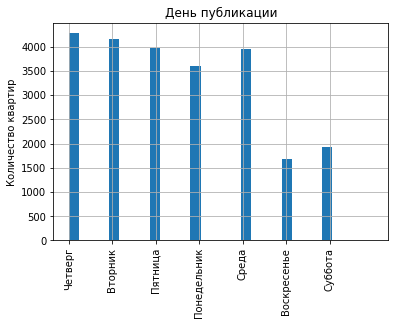

In [74]:
plt.hist(data['weekday_exposition'], bins=30,range=(0,7))
plt.title('День публикации')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

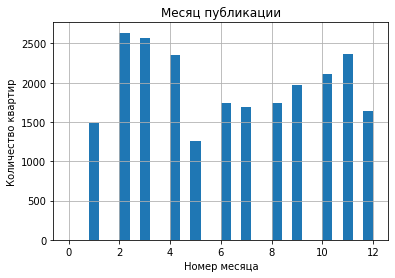

In [75]:
plt.hist(data['month_exposition'], bins=30,range=(0,12))
plt.title('Месяц публикации')
plt.xlabel('Номер месяца')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

**Вывод:**

- Обьявлений поданых в январе и мае меньше всего, скорей всего сваязанно с затяжными праздниками этих месяцев
- Так же в выходныве дни реже всего выставляют квартиры на продаже

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае все на шашлыках)
</div>

### Анализ растояния до центра/аэропорта/парка

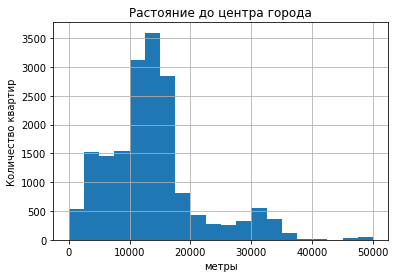

In [76]:
plt.hist(data['city_centers_nearest'], bins=20,range=(0,50_000))
plt.title('Растояние до центра города')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

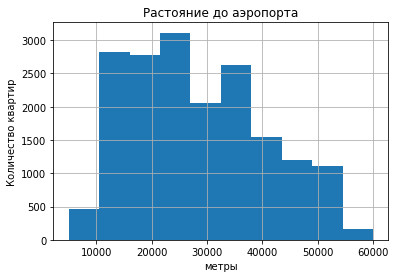

In [77]:
plt.hist(data['airports_nearest'], bins=10,range=(5000,60_000))
plt.title('Растояние до аэропорта')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

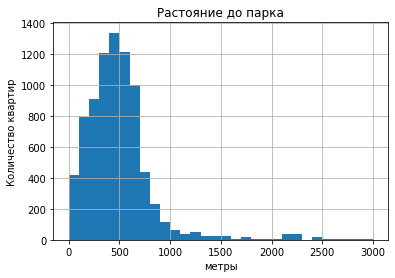

In [78]:
plt.hist(data['parks_nearest'], bins=30,range=(0,3000))
plt.title('Растояние до парка')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

**Вывод:**

- Санкт-Петербург - город парков, больше всего квартир на растоянии 500 метров от парка, правда в этой графе больше всего пропусков, которые не востановил, так что данный график не показательный
- Растояние до центра в основном в районе 15 000 метров (15км)
- Основная масса продаж в районе 2-20 км от центра
- Почти все продажи расположены на растоянии 10-50 км от аэропорта

### Анализ скорости продажи квартиры

In [79]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

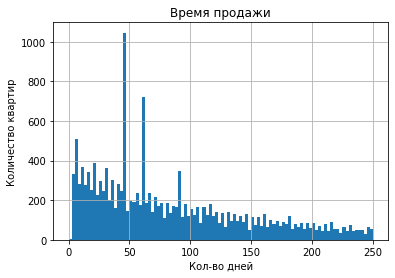

In [80]:
plt.hist(data['days_exposition'], bins=100,range=(0,250))
plt.title('Время продажи')
plt.xlabel('Кол-во дней')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()


In [81]:
print('Среднее количество дней в продаже:', round(data['days_exposition'].mean()))
print('Медианное количество дней в продаже:', round(data['days_exposition'].median()))

Среднее количество дней в продаже: 181
Медианное количество дней в продаже: 95


**Вывод:**

- Самые быстрые продажи - 45 дней
- Долгие продажи - 230 дней и больше
- В основном обьявления висят в районе 100 дней

### Факторы стоимости

#### Цена - общая площадь

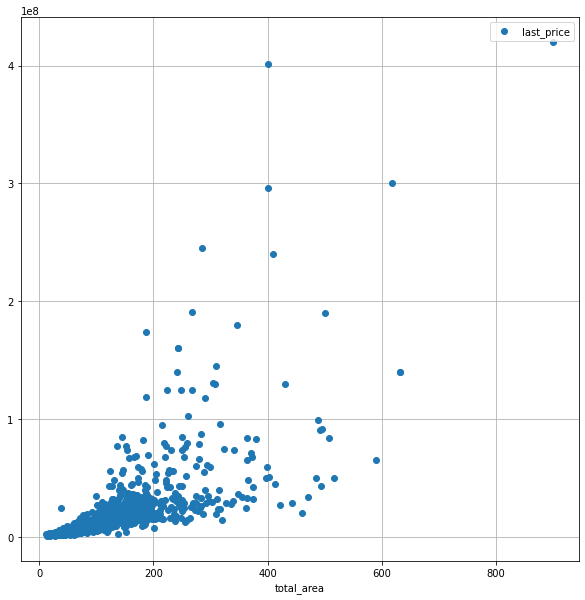

Корреляция цены к площади:


,last_price,total_area
last_price,1.000000,0.934077
total_area,0.934077,1.000000


In [82]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10,10))
plt.show()
print('Корреляция цены к площади:')
data.pivot_table(index='balcony', values=['total_area', 'last_price']).corr()

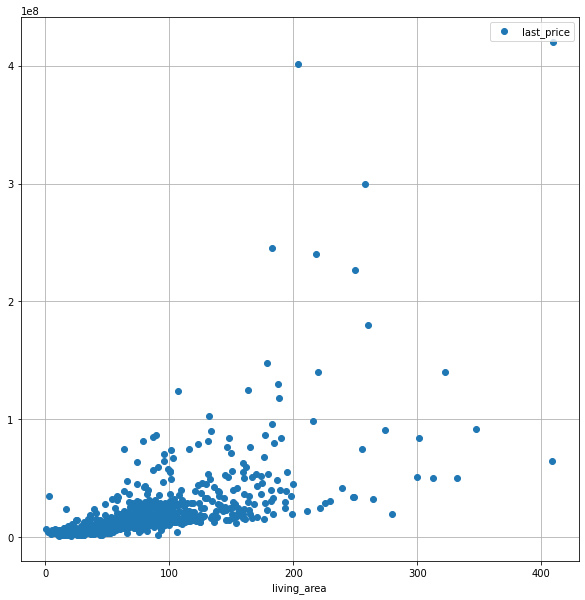

Корреляция цены к жилой площади:


,last_price,living_area
last_price,1.000000,0.950633
living_area,0.950633,1.000000


In [83]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10,10))
plt.show()
print('Корреляция цены к жилой площади:')
data.pivot_table(index='balcony', values=['living_area', 'last_price']).corr()

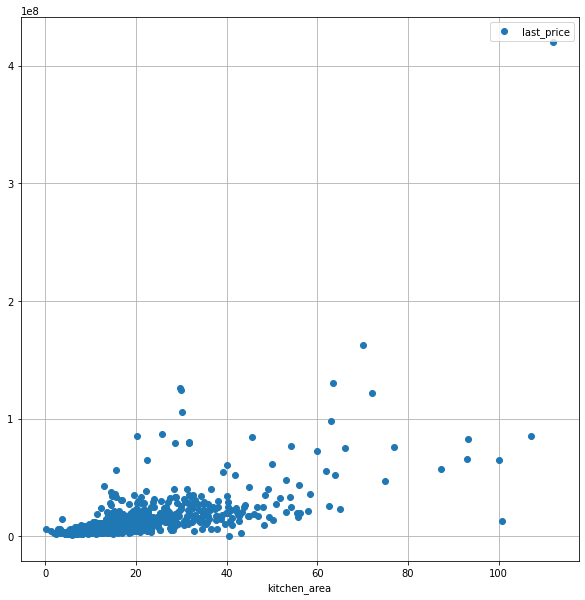

Корреляция цены к площади кухни:


,kitchen_area,last_price
kitchen_area,1.000000,0.851183
last_price,0.851183,1.000000


In [84]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10,10))
plt.show()
print('Корреляция цены к площади кухни:')
data.pivot_table(index='balcony', values=['kitchen_area', 'last_price']).corr()

**Вывод:**

На цену обьекта прямо влияет общая площадь, жилая площадь имеет максимальное влияние на цену, площадь кухни имеет меньшее влияние ценообразования, но тоже весьма существена

#### Цена - кол-во комнат/этаж

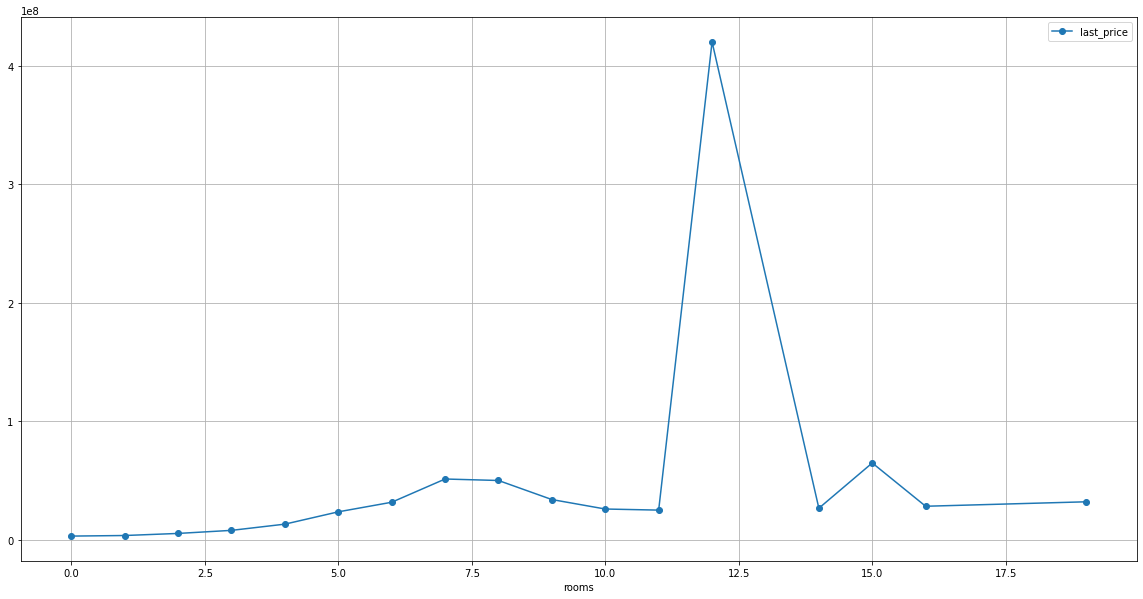

Корреляция цены к количеству комнат:


,last_price,rooms
last_price,1.000000,0.938947
rooms,0.938947,1.000000


In [85]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(20,10))
plt.show()
print('Корреляция цены к количеству комнат:')
data.pivot_table(index='balcony', values=['rooms', 'last_price']).corr()

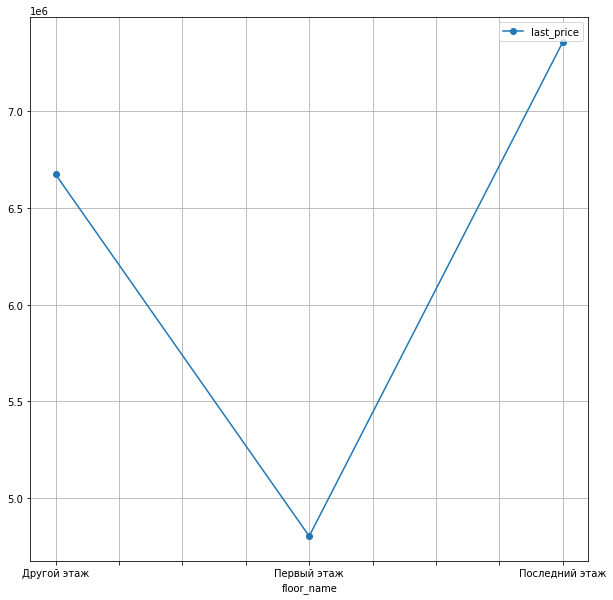

In [86]:
data.pivot_table(index='floor_name', values='last_price').plot(grid=True, style='o-', figsize=(10,10))
plt.show()

**Вывод:**

Чем больше комнат, тем больше цена

#### Цена - дата публикации

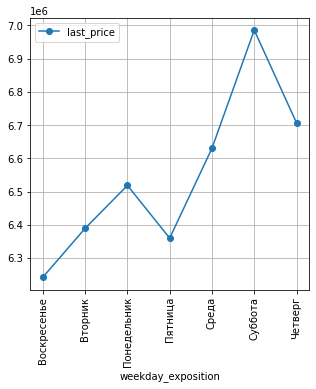

In [87]:
data.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

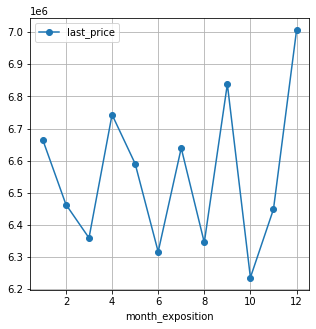

Корреляция цены к месяцу:


,last_price,month_exposition
last_price,1.000000,-0.877245
month_exposition,-0.877245,1.000000


In [88]:
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.show()
print('Корреляция цены к месяцу:')
data.pivot_table(index='balcony', values=['month_exposition', 'last_price']).corr()

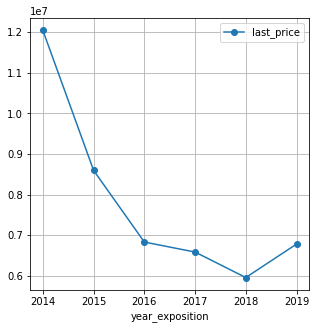

Корреляция цены к году:


,last_price,year_exposition
last_price,1.000000,0.369223
year_exposition,0.369223,1.000000


In [89]:
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.show()
print('Корреляция цены к году:')
data.pivot_table(index='balcony', values=['year_exposition', 'last_price']).corr()

**Вывод:**

- Цена квартир падает с 2014 по 2018 год, но после 2018 года цена начала снова повышаться
- Самые дорогие квартиры опубликовали в среду, субботу и четверг
- самые дорогие месяца по публикации квартир это апрель и сентябрь, хотя в декабре тоже есть дорогие обьявления

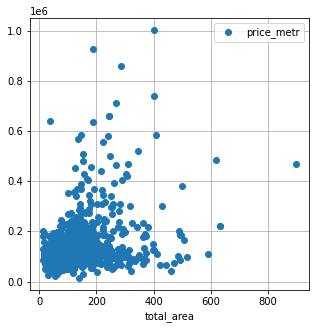

Корреляция метра к площади квартиры:


,price_metr,total_area
price_metr,1.000000,0.808354
total_area,0.808354,1.000000


In [90]:
data.pivot_table(index='total_area', values='price_metr').plot(grid=True, style='o', figsize=(5,5))
plt.show()
print('Корреляция метра к площади квартиры:')
data.pivot_table(index='balcony', values=['total_area', 'price_metr']).corr()

### Cредняя цена одного квадратного метра в 10 населённых пунктах 

In [91]:
data_mean_10 = data['locality_name'].value_counts().head(10)

In [92]:
mean_price_10 = (data.query('locality_name in (@data_mean_10.index)')
                            .pivot_table(index = 'locality_name', values = 'price_metr')
                )

In [93]:
mean_price_10.astype(int).sort_values('price_metr', ascending=False)

,price_metr
locality_name,
санкт-петербург,114868
пушкин,103125
деревня кудрово,92473
пгт парголово,90175
пгт мурино,85629
пгт шушары,78551
колпино,75424
гатчина,68746
всеволожск,68654


In [94]:
print('Самый дорогой квадратный метр:')
(data.pivot_table(index = 'locality_name', values = 'price_metr', aggfunc = max)
 .sort_values('price_metr', ascending=False)
 .astype(int)
 .head()
)

Самый дорогой квадратный метр:


,price_metr
locality_name,
санкт-петербург,1907500
всеволожск,640422
зеленогорск,323943
пушкин,256521
петергоф,225971


In [95]:
print('Самый дешёвый квадратный метр:')
(data.pivot_table(index = 'locality_name', values = 'price_metr', aggfunc = max)
 .sort_values('price_metr')
 .astype(int)
 .head()
)

Самый дешёвый квадратный метр:


,price_metr
locality_name,
деревня вахнова кара,11688
деревня старополье,12250
пгт совхозный,12702
деревня малая романовка,12724
пгт тёсово-4,12931


**Вывод:**

- Самые дорогие квартиры в Санкт-Петербурге, правда и так понятно что "Вторая столица" будет самой дорогой, за ним город пушкин
- максимальная цена за квадратный метр в Питере - почти 2 миллиона
- самая маленькая цена за квадратный метр в деревне Вахнова Кара - 11500

#### Цена килломента в Санкт-Петербурге

<AxesSubplot:xlabel='Километр', ylabel='цена'>

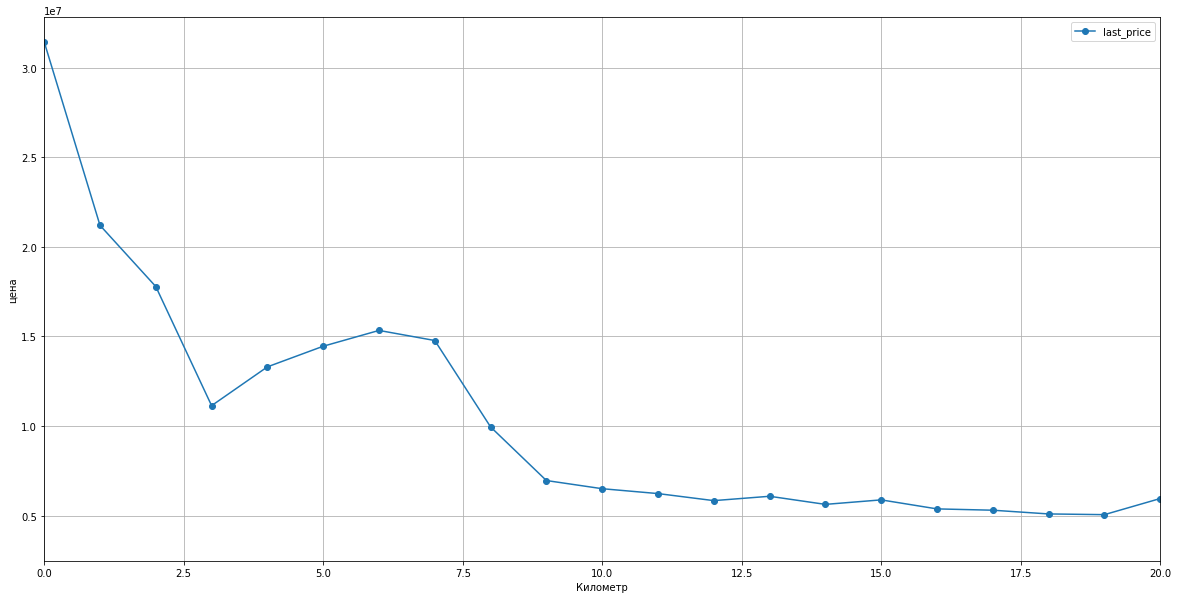

In [96]:
(data.query('locality_name == "санкт-петербург"')
 .pivot_table(index='city_centers_nearest_km', values='last_price')
 .plot(grid=True, style='o-', xlim=(0,20), figsize=(20, 10), xlabel='Километр', ylabel='цена')

)

**Вывод:**

- на растоянии до 1 км от центра самые дорогие квартиры
- со 2км до 7 км основное ценообразование по обьявлениям
- после 7км идет резкий спад стоимости жилья в Санкт-Петербурге

In [97]:
print('Средняя цена квадратного метра по удаленности от центра:')
(data.query('locality_name == "санкт-петербург"')
 .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc = 'mean')
 .astype(int)
 .head(15)
)

Средняя цена квадратного метра по удаленности от центра:


,last_price
city_centers_nearest_km,
0.0,31449115
1.0,21206720
2.0,17788319
3.0,11137394
4.0,13304279
5.0,14455995
6.0,15338418
7.0,14775152
8.0,9949111


## Общий вывод

**Самым трудоемким процессом оказался как и обучают предобработка данных, в дальнейшем были небольшие заминки по построению графиков, но в целом все получилось**
<br>**В анаолизе видно что самые дорогие квартиры как и предпологалось в самом центре**<br>
<br>**Так же встречались аномальные значения в высоте потолков - 27 метров или вообще 100 метров, проверив иднивидуально убедился что это аномалии и исправил их**<br>
<br>**На стоимость квартир очень влияет площадь и жилая площадь обдьекта, так же как и количество комнат(хотя странно было бы если 200 метровая квартира была бы 1-комнатная)**<br>
<br>**Люди реже выставляют обьявления в выходные и праздничные месяца**<br>